### Introduction

In this problem, Data Science helps real estate agents to predict property prices based on other features. This report analyses how the set of features affect the price of the house. This report uses linear, polynomial,multiple linear regression, ridge regression, and lasso regression models to examine the relationship between characteristics such as sqft_living, view, beadrooms, bathrooms and so on  and housing prices. This study visualises data and variable correlations to understand property pricing better. Data science could help individuals make better real estate choices.

### Importing Libraries

following python libraries are used for loading the house_data.csv, exploring and visualizing the data, developing the machine learning model (Regression model), evaluating the model, visaulizing actual and predicted values as plots, making predictions for test dataset and saving predictions as csv file.

1. Pandas - Open source data manipulation and analysis python library that is used to efficienlty storing and manipulating large datasets, handling missing values in the data, data alignment and reshaping the data,grouping and aggregation of data, loading and storing data into other formats like CSV.

2. numpy - Open source python library for numerical computing. It provides supports for  mulitdimensional arrays, vectorized optimizations, matrices, and mathematical functions. 

3. matplotlib - open source plotting python library. it is used to create static, animative , and interactive graphs and visualizations in python. 

4. seaborn - Seaborn is a statistical data visualization library for Python that is built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics. Seaborn simplifies the process of creating complex visualizations and enhances the aesthetics of Matplotlib plots.

5. scikit-learn - Open source machine learning library for Python. It provides simple and efficient tools for data analysis and modeling, including various machine learning algorithms and utilities for tasks such as classification, regression, clustering, dimensionality reduction, and more.

6. random - python library which provides functions for generating randm numbers.

7. sympy - It provides tools for working with symbolic mathematical expressions, performing algebraic manipulations, solving equations symbolically and etc. 

8. mlxtend - Python library that provides additional functionalities and extensions for machine learning with scikit-learn. It supports feature selection, model evaluation, plotting, and etc.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
import random 
import sympy as sp
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error


#### A. Data Exploration

Training data is loaded and explored to find the insights of the data.

training data house_data.csv is loaded using pandas as dataframe and assigned to train data variable.

In [2]:
#load the training data
train_data = pd.read_csv('house_data.csv')
print("Size of train dataset: ", train_data.shape)
train_data.head(10)

Size of train dataset:  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


training data contains 21613 rows and 21 columns. first 10 rows of training data is also displayed to get some insights about the data.

In [3]:
#columns of training dataset
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

training dataset contains following columns(features).
- id
- date
- price
- bedrooms
- bathrooms
- sqft_living 
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15



In [4]:
#information of training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

info() method is used to obatin the information such data types of each columns, number of non-null rows of each column in the training dataset.

there are 5 float64 data type columns, 15 int64 data type columns, and only one object data type column which is date. 

there is no null values in any of the columns of training dataset.

In [5]:
#describe the training dataset
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


describe() method is applied to the data frame to obatin statistical representation of training data such mean, count, standard deviation, minimum, maximum and so on.

Since price is a target variable, describe() method is applied to particular column in next cell.

In [6]:
#house price distribution of training dataset
print(train_data['price'].describe())


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


matplotlib histplot is used to visualize the distribution of price feature of training data.

Text(0.5, 1.0, 'House Price Distribution')

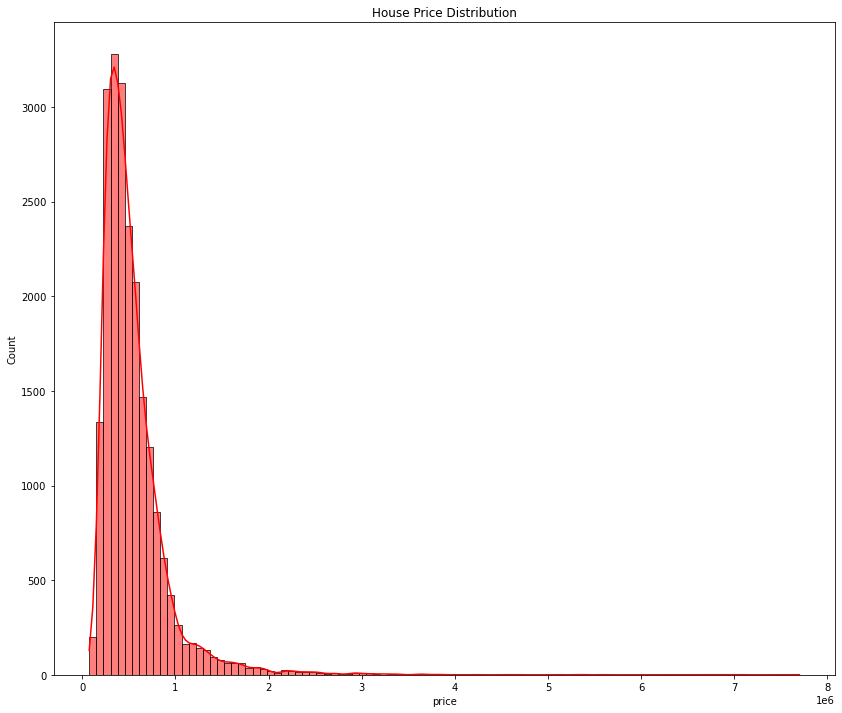

In [7]:
#plot the house price distribution of training data
plt.figure(figsize=(14, 12))
sns.histplot(data=train_data,x='price',color='r',kde=True,bins=100)
plt.title('House Price Distribution')

In [8]:
#data types of features in train data
print(set(train_data.dtypes.to_list()))

{dtype('float64'), dtype('O'), dtype('int64')}


select_dtypes() method with specic parameter is used to select the numerical columns and numerical columns of dataframe is displayed.

In [9]:
#Numerical features distribution of training data
train_data_num=train_data.select_dtypes(include = ['float64', 'int64'])
train_data_num.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [10]:
#numerical features of training data
train_data_num.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

visualize all the numerical columns as historgrams using hist.

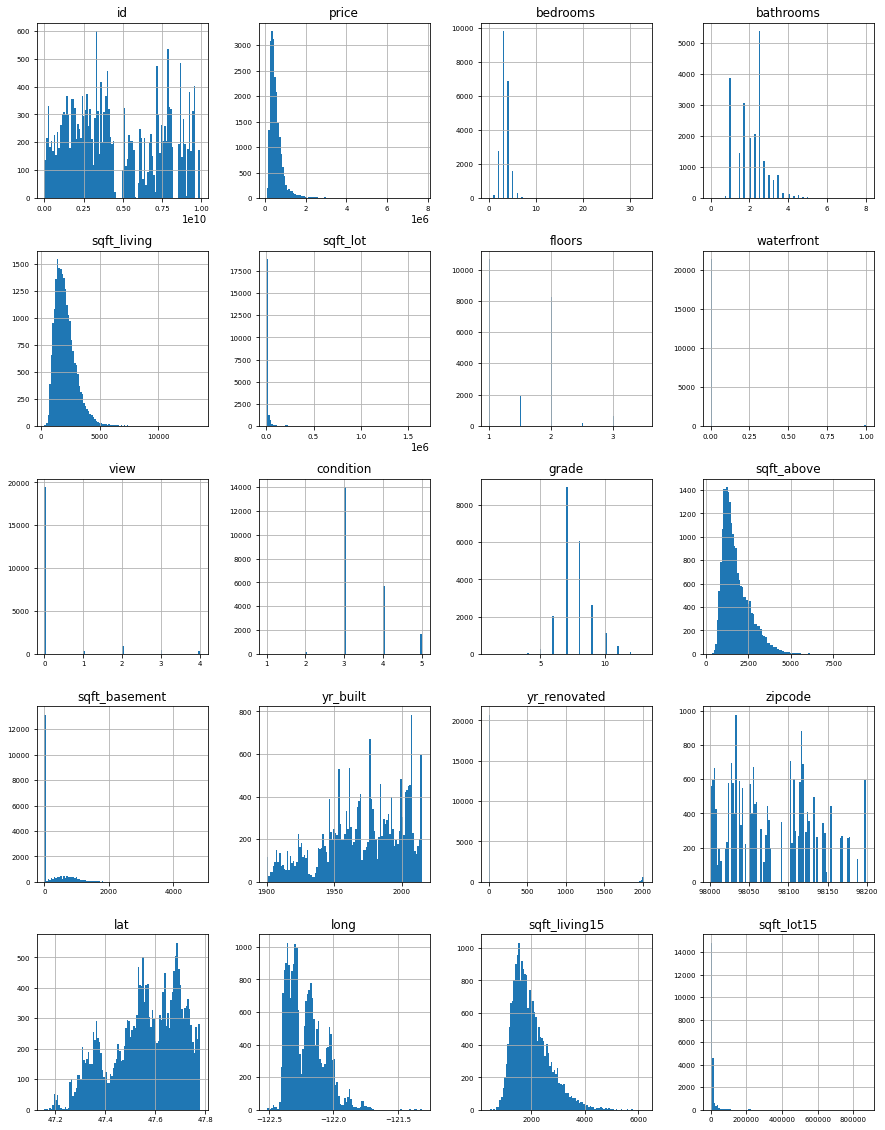

In [11]:
#visualize the distribution of numerical features
train_data_num.hist(figsize=(15, 20), bins=100, xlabelsize=7, ylabelsize=7);



correlation between numerical features are obtained and heatmap is plotted. 

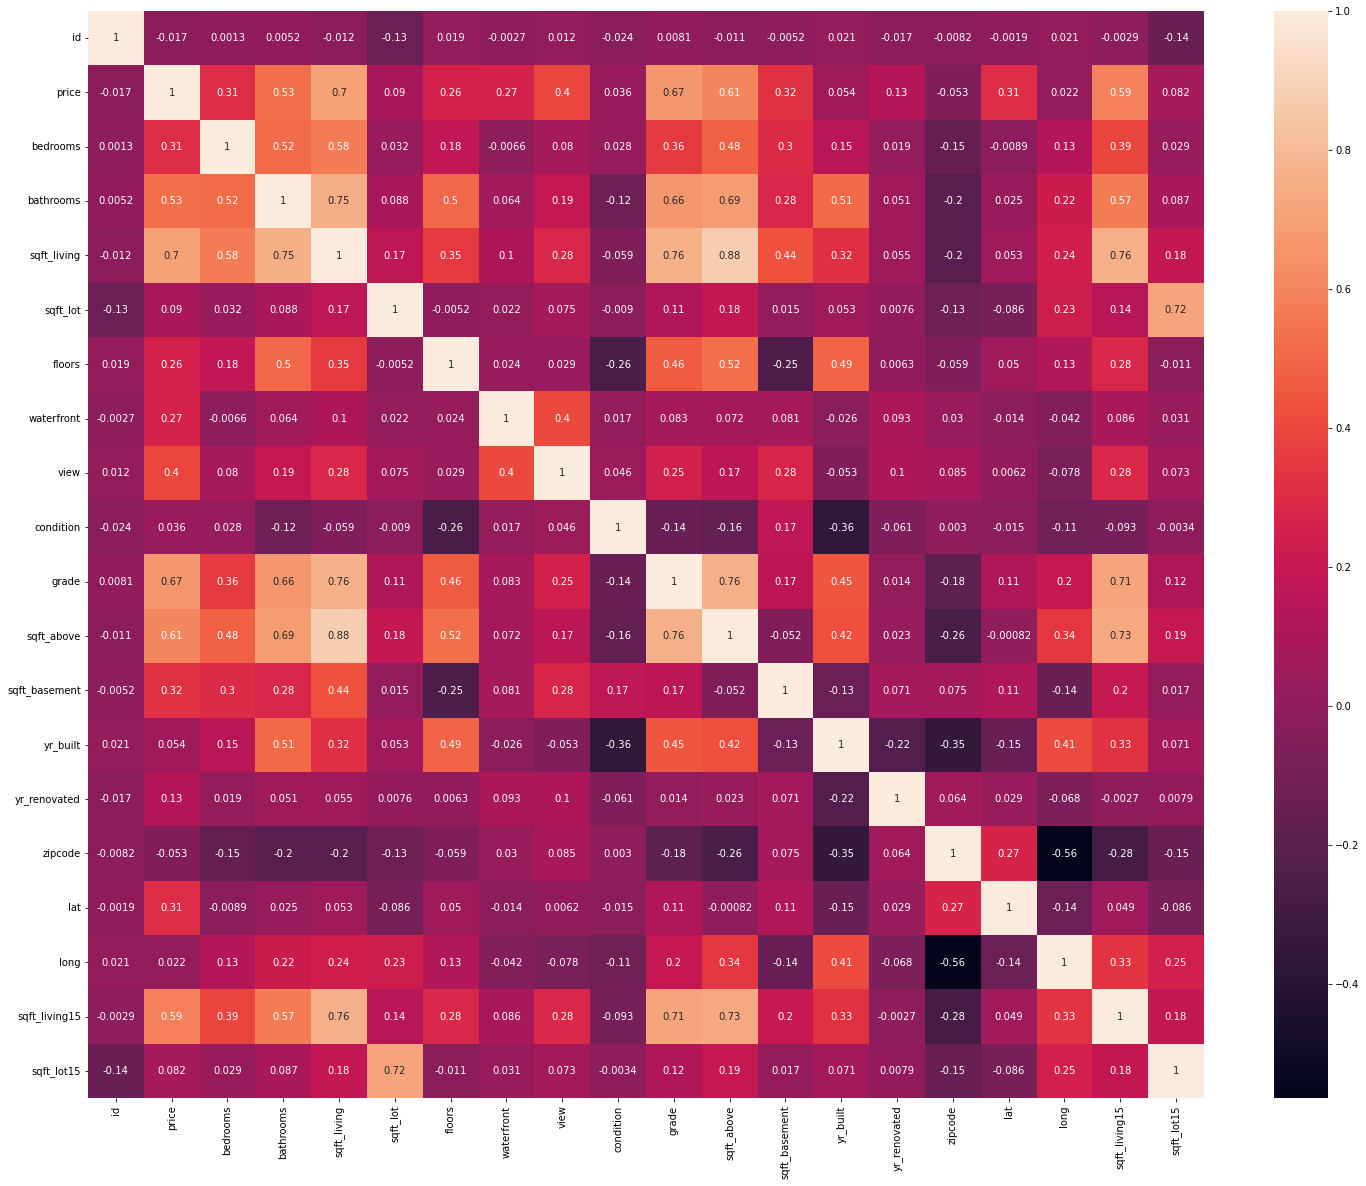

In [12]:
#correlation heat map of numerical features of training data
corr = train_data_num.corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax);

sqft_living, grade, sqft_above, sqft_living15, and bathrooms are the top 5 positively correlated features with target price. it means those are features most likely will decide the price of house. 

In [13]:
#check null values in training data
missing_data = train_data.isna().sum()
missing_data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### B. Data Preprocessing

In the Data Preprocessing section, I mainly removed unwanted columns from dataframe, removed categorical columns, created train and test set , and do the scaling of features.

Since id feature has high cardinality, I dropped that features from training dataframe.

In [14]:
#drop id column - high cardinality feature
train_data.drop('id',axis=1,inplace=True)


In [15]:
#find the object type columns 
train_data.select_dtypes(include='object').columns

Index(['date'], dtype='object')

In [16]:
#remove date feature 
train_data.drop('date',axis=1,inplace=True)

In [17]:
train_data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In this regression problem, price is a target variable. corr() method is used to obtain the correlation between features. I obtained the correlation values between price and other features. 

In [18]:
#correlation of other features with price feature in training data
correlation_matrix = train_data.corr()
price_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
price_correlation

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
Name: price, dtype: float64

According to the output obtained, sqft_living has high positive correlation with price which is 0.70 and long has lowest correlation with price which is 0.021626.

In [19]:
#categorical features
categorical_cols = ['waterfront','grade','condition','zipcode']


In following cell, i dropped categorical columns such as waterfront, grade, condition, zipcode from  the training dataframe and displayed first 10 rows of output dataframe. 

In [20]:
#remove categorical features from training data
train_data = train_data.drop(categorical_cols, axis=1, inplace=False)
train_data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,1890,0,2003,0,47.3684,-122.031,2390,7570


In [21]:
#columns after removing categorical and unwanted features
train_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
#numerical column list
numerical_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                   'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
                  'sqft_living15', 'sqft_lot15']

since sqft_living is a highly correlated feature with price, I visualized price and sqft_living in a scatterplot to see that how sqft_living feature affects the price of the house. 

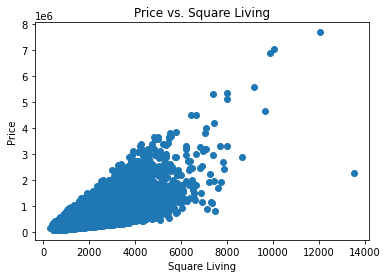

In [23]:
#visualize the highly correlated feature sqft_living 
plt.scatter(train_data['sqft_living'], train_data['price'])
plt.xlabel('Square Living')
plt.ylabel('Price')
plt.title('Price vs. Square Living')
plt.show()

In [24]:
#create features X and lables y from traing data frame 
X = train_data.drop('price', axis=1)
y = train_data['price']

sklearn train_test_split is used to obtain the train and test data features and label from training dataframe by haveing fteaures,labels, test_size and random state as parameters. 

In [25]:
#create train and test set from features X and label y using random_state as 82.(student id = last 2 digits of my student id )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

numerical features of each train and test datafeame is obtained select_dtypes method. 

In [26]:
#numeric features of train and test dataframe
X_train_num_df = X_train.select_dtypes(include=[np.number])
X_test_num_df = X_test.select_dtypes(include=[np.number])

Scaling in machine learning is the process of normalizing the features of a dataset. It is a crucial preprocessing step, especially when working with algorithms that are sensitive to the scale of input features. Scaling helps in improving the performance and convergence of many machine learning algorithms. Min Max Scaling and Standard Scaling(Z -Score Normalization) are the main techniques of Scaling. 

Standard Scaling - It standardizes the features to have a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean and dividing by the standard deviation of the feature.

Scikit learn StandardScaler() is used to do the Standard Scaling. It will take train and test dataframes as inputs seperately and produced the scaled train and test dataframes.

In [27]:
#scaling the train and test features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num_df)
X_test_scaled = scaler.transform(X_test_num_df)

#### C. Model Building

Since target variable is continous numerical variable and dataset is labelled, this is supervised leaning regression problem. Following regression models are developed. 

1. Simple Regression Model (Closed Form and Gradient boost optimization approach)
2. Polynomial Regression
3. Multi Regression
4. Ridge Regression
5. Lasso Regression

Developed models are trained using preprocessed dataset and evaluated.

##### Simple Regression

A simple regression model is a type of statistical model that examines the relationship between one independent variable and one dependent variable. The goal of a simple regression analysis is to understand how changes in the independent variable are associated with changes in the dependent variable.

Closed Form 

The closed-form solution for the parameters of a simple linear regression model involves finding the values of the slope and the y-intercept that minimize the sum of the squared differences between the observed and predicted values.

Here We calculate the gradient of the Residual Sum of Squares (RSS) with respect to the parameters W0 and W1 in a simple linear regression model.


In [28]:
#closed form
#Define Symbols
W0, W1, X, Y = sp.symbols('W0 W1 X Y')
# Define RSS equation
RSS_Eq = (Y-(W0+W1*X))**2 

# Calculate the gradient
gradient = [sp.diff(RSS_Eq, W0), sp.diff(RSS_Eq, W1)]
gradient

[2*W0 + 2*W1*X - 2*Y, -2*X*(-W0 - W1*X + Y)]

find the values of W0 and W1 that satisfy following both equations, giving you the critical points where the gradient is zero.

In [29]:
eq1 = sp.Eq(gradient[0],0)
eq2 = sp.Eq(gradient[1],0)
sp.solve([eq1,eq2],(W0,W1))

{W0: -W1*X + Y}

In [30]:
#delete variables
del W0, W1, X ,Y ,RSS_Eq, eq1, eq2,

Since sqft_living feature is a highly correlated featue with price, i took sqft_living feature as inpput feature simple regression model.

In [31]:
#sqft_living feature as input for the simple regression model
x=np.array(X_train['sqft_living'])
y=np.array(y_train)
N=len(y)
print('Number of train data after split is: %d'%N)

Number of train data after split is: 17290


simple linear regression equation for calculating following using numpy. 
1. sxy -sum of x*y
2. sy - sum of y
3. sx - sum of x
4. sxs - sum of squared of x


In [32]:
sxy = np.sum(x*y)
print('sxy: ',sxy)
sy = np.sum(y)
print('sy',sy)
sx= np.sum(x)
print('sx',sx)
sxs = np.sum(x**2)
print('sxs',sxs)

sxy:  23490135236673.0
sy 9326877543.0
sx 35932394
sxs 89233048710


In [33]:
#calculating the coeffficient of simple regression model using closed form approcach
w1_cf = (sxy-(1/N)*sy*sx)/(sxs - (1/N)*sx*sx)
w1_cf 
w0_cf = (1/N)*sy - (w1_cf/N)*sx
w0_cf

-46845.293814140605

In [34]:
#simple regression equation
y_hat_cf= w0_cf+w1_cf*x

In [35]:
#residual sum of squares(RSS)
rss_cf = np.sum((y-y_hat_cf)**2)
rss_cf

1205789841260880.2

gradient descent 

this implementing simple linear regression using gradient descent involves iteratively updating the parameters w0 and W1 to minimize the cost function, which is typically the Mean Squared Error (MSE) in the context of linear regression. The gradient descent update rules are based on the partial derivatives of the cost function with respect to the parameters.

we implemented gradient decent for simple linear regression in the following cell. 

In [36]:
# Convergence criteria
tolerance = 1e-4
max_iterations = 1000

# Initialize starting point, learning rate, and trajectory
initial_point = np.array([random.uniform(-1000, 1000), random.uniform(-1000, 1000)])
learning_rate = 1e-12
trajectory = [list(initial_point)]
converged = False
iteration = 0

def RSS_gradient(params,x,y):
    w0,w1 = params
    w0_pd = -2 * np.sum (y-(w0+w1*x))
    w1_pd = -2 * np.sum ((y-(w0+w1*x))*x)
    return np.array([w0_pd,w1_pd])

w0w1 = initial_point
# Perform gradient descent
while not converged:
    # Calculate the negative gradient
    diff = -learning_rate * RSS_gradient(w0w1,x,y)
    
    # Check if the absolute gradient vector is within the tolerance
    if np.all(np.abs(diff) <= tolerance):
        converged = True
        break
    
    # Update the current point using the gradient
    w0w1 += diff
    
    # Add the updated point to the trajectory
    trajectory.append(list(w0w1))
    
    iteration += 1
    
    # Check for maximum iterations to avoid infinite loops
    if iteration >= max_iterations:
        break

following cell implements display the convergence status, calculate the optimal value for the Residual Sum of Squares (RSS) at the converged point, and plot the convergence trajectory. 

Converged: False
The optimal value for the RSS is 1211988256683647.5, with x equal to 31.66877188062339 and y equal to 263.2320377730929. 


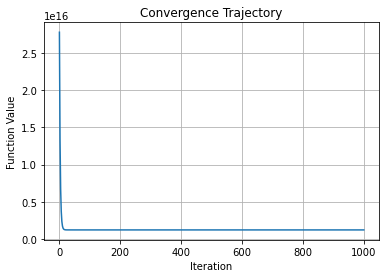

In [37]:
# Output the convergence status
print("Converged:", converged)

# Calculate the values of the quadratic function for each point in the trajectory
def rss_gd(params,x,y):
    w0_gd, w1_gd = params
    y_hat_gd = w0_gd+w1_gd*x
    rss_gd =  np.sum((y-y_hat_gd)**2)
    return rss_gd

print(f"The optimal value for the RSS is {rss_gd(w0w1,x,y)}, with x equal to {w0w1[0]} and y equal to {w0w1[1]}. ")

function_values = [rss_gd(p,x,y) for p in trajectory]

# Plot the convergence trajectory
plt.plot(np.arange(len(trajectory)), function_values)
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.title("Convergence Trajectory")
plt.grid(True)
plt.show()

following cell implements, calculating the Residual Sum of Squares (RSS) at the optimal values of W0 and W1 obtained from the gradient descent optimization

In [38]:

w0_gd, w1_gd = w0w1
y_hat_gd = w0_gd+w1_gd*x
#residual sum of squares - gradient boost
rss_gd =  np.sum((y-y_hat_gd)**2)
rss_gd

1211988256683647.5

##### Polynomial Regression

We visualize the relationship between square footage of living space ('sqft_living') and price in a scatter plot using matplotlib. 

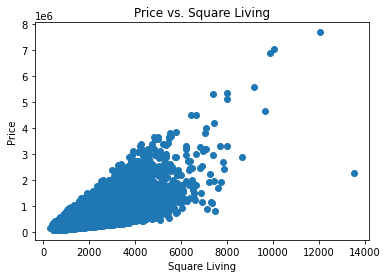

In [39]:
#Scatter plot to visualize the relationship between square footage of living space and property price
plt.scatter(train_data['sqft_living'], train_data['price'])
plt.xlabel('Square Living')
plt.ylabel('Price')
plt.title('Price vs. Square Living')
plt.show()

by observing the scatter plot, we can confirm that sqft_living feature is positively correlated with house price.

Here we performs polynomial regression with a degree of 2  using scikit-learn PolynomialFeatures and then transform train dataframe and test dataframe.

developed polynomial regression and trained the model using transformed train dataframe and train labels.

In [40]:
#polynomial regression
#transforming the training and test data to polynomial features
#fitting a linear regression model to the polynomial features
degree=2
poly = PolynomialFeatures(degree)
poly
X_train_polynomial = poly.fit_transform(X_train_num_df)
X_test_polynomial = poly.transform(X_test_num_df)
polynomial_reg_model = LinearRegression()
polynomial_reg_model.fit(X_train_polynomial, y_train)

LinearRegression()

In [41]:
## Printing the intercept and coefficients of the Polynomial Regression model
print(f"Polynomial Rgression model Intercept: {polynomial_reg_model.intercept_}")
print(f"Polynomial Rgression model Coefficients: {polynomial_reg_model.coef_}")

Polynomial Rgression model Intercept: -1358346670.8695593
Polynomial Rgression model Coefficients: [ 9.31682775e+01  2.12669565e+07 -1.23046440e+07 -3.48531789e+04
  1.75971876e+02  5.47745148e+06  1.00038203e+07 -3.03965867e+04
 -7.43362524e+03  3.93647274e+05  1.46625381e+04  1.01061514e+08
  2.31117169e+07 -1.18823835e+04  1.78218245e+02  1.42848665e+03
  5.67382186e+03 -2.53691916e+01  1.07716162e-02  2.41025147e+04
 -1.61319817e+04 -2.09628753e+01 -7.97962654e+00 -6.04423069e+02
 -2.14941662e+00 -6.98764011e+04  1.37213351e+05  1.54696395e+01
  1.67197095e-01 -1.37177169e+04  2.64395266e+01 -8.50023793e-02
 -9.46071157e+03  1.03534424e+04  7.91643151e+00  1.76984446e+01
  3.66960100e+02 -1.43618025e+01  9.68833890e+04 -5.68806138e+04
  1.59466800e+01  2.54606083e-01  9.58618604e+01 -1.27000988e+03
 -2.49622049e+01  1.12313308e+01 -1.25955423e+02 -5.02996470e+01
 -6.38671485e+01 -8.51425718e+00  1.84240962e+02 -2.10442186e+02
 -9.03070071e+01 -5.40319442e+02 -4.61935997e-07  2.5761

##### Mutliple Regression


Multiple regression is a statistical technique used to examine the relationship between a dependent variable and two or more independent variables.

This following cell implements forward feature selection with a Sequential Feature Selector  and a multiple Linear Regression model. It identifies the optimal subset of features by maximizing the negative mean squared error through 5-fold cross-validation, providing the selected feature indices and corresponding feature names from the training data.

In [42]:
#Multiple regression
multi_reg_model = LinearRegression()
# Create the SequentialFeatureSelector for forward feature selection
sfs = SequentialFeatureSelector(multi_reg_model, forward=True, k_features='best', scoring='neg_mean_squared_error', cv=5)

# Fit the SequentialFeatureSelector on the training data
sfs = sfs.fit(X_train, y_train)

#selected feature indices
print("Selected Feature Indices: ",sfs.k_feature_idx_)

# selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)


Selected Feature Indices:  (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13)
Selected Features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


according to the forward feature selection, features such as bedrooms,bathrooms, sqft_living, sqft_lot,view highly affects the price of the house. 

Following cell transforms the training and test data to include only the features selected through forward feature selection. The Linear Regression model is then fitted on the subset of selected features from the training data.

In [43]:
# Transform the training and test data to include only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Fit the model on the selected features
multi_reg_model.fit(X_train_selected, y_train)

LinearRegression()

##### Ridge Regression

Ridge regression is also known as L2 regularization, is a linear regression technique that introduces a regularization term to the ordinary least squares (OLS) objective function. This regularization term is the L2 norm (sum of squared values) of the coefficients, multiplied by a regularization parameter (α). The objective of ridge regression is to find the values of the coefficients that minimize the sum of squared differences between the observed and predicted values, while also penalizing large coefficients.

This cell performs Ridge regression with hyperparameter tuning using RandomizedSearchCV. It initializes a Ridge regression model, defines a range of alpha values, and conducts a randomized search to find the optimal alpha using 5-fold cross-validation on the training data. The best hyperparameters are then printed.

In [44]:
# Ridge regression model
ridge_reg_model = Ridge()

# alpha values
param_alpha = {'alpha': np.linspace(0, 20, 100)}

randomizedsearchCV = RandomizedSearchCV(ridge_reg_model, cv=5, param_distributions=param_alpha, random_state=82)

# Fit the RandomizedSearchCV on the training data
randomizedsearchCV.fit(X_train_scaled, y_train)

# hyperparameters
print("hyperparameters:", randomizedsearchCV.best_params_)


hyperparameters: {'alpha': 16.96969696969697}



According to the output, optimal value for regularization parameter is 16.96969696969697. It initializes a Ridge regression model with the chosen alpha, fits the model to the scaled training data (X_train_scaled, y_train), and then prints the coefficients of the model. The coefficients represent the weights assigned to each feature in the model.

In [45]:
#final ridge regression model model
alpha = 16.969
ridge_reg_model = Ridge(alpha=alpha)

ridge_reg_model.fit(X_train_scaled, y_train)
ridge_reg_model.coef_

array([-44426.54827359,  42351.24780886, 111502.81615017,   4915.47167007,
         4799.59691433,  63605.03946615, 107556.9721274 ,  30214.91914391,
       -59892.56218326,  11114.81282161,  85275.43354397, -28517.1856505 ,
        46738.80894634, -11368.24668601])

##### Lasso Regression model


Lasso Regression is a linear regression technique that introduces a penalty term, proportional to the absolute values of the regression coefficients, in order to encourage sparsity in the model and perform automatic feature selection during the learning process.

Here we implements a Lasso Regression model using scikit-learn. The Lasso Regression model is instantiated with a specific regularization parameter (alpha) set to 6.09 and a maximum number of iterations (max_iter) set to 10,000. The model is then fitted to the training data (X_train_scaled and y_train). The regularization parameter (alpha) controls the strength of regularization, influencing the sparsity of the model by penalizing the absolute values of the coefficients.

alpha and max_iter are manually changed so that we got the suitable model. 

In [46]:
#Lasso Regression model #alpha is randomly changed and set to this value
lasso_reg_model = Lasso(alpha=6.09,max_iter=10000)          
lasso_reg_model.fit(X_train_scaled, y_train)

Lasso(alpha=6.09, max_iter=10000)

#### E. Model Assessment


we make the predictions (y_predictions_simple_linear) using a simple linear regression model with coefficients calculated through a closed-form approach beacuse it has lower residual sum of squares compared to gradient boost approach. The model is based on the equation y = w0 + w1.x. 

In [47]:
#predictions on test data
#simple regression model (closed form approach- it has lower rss compared to gradient boost approach)
x_test=np.array(X_test['sqft_living'])
y=np.array(y_test)
y_predictions_simple_linear= w0_cf+w1_cf*x_test

In this cell, we make the predictions based polynomial regression model.

In [48]:
#Polynomial regression model
y_predictions_polynomial = polynomial_reg_model.predict(X_test_polynomial)

In this cell, we make the predictions using multi regression model.

In [49]:
# Multi regression model
y_predictions_multi = multi_reg_model.predict(X_test_selected)

Ridge regression model is used to make the predictions.

In [50]:
#Ridge Regression model
y_predictions_ridge=ridge_reg_model.predict(X_test_scaled)

Lasso Regression model is used to make the predictions.

In [51]:
#Lasso Regression model
y_predictions_lasso=lasso_reg_model.predict(X_test_scaled)


following cell visualizes the actual versus predicted values obtained from five different regression models (Simple Linear, Polynomial, Multiple, Ridge, and Lasso) in a scatter plot. The red line represents a perfect match where actual and predicted values are equal. This allows for a quick comparison of model performance across different regression techniques.

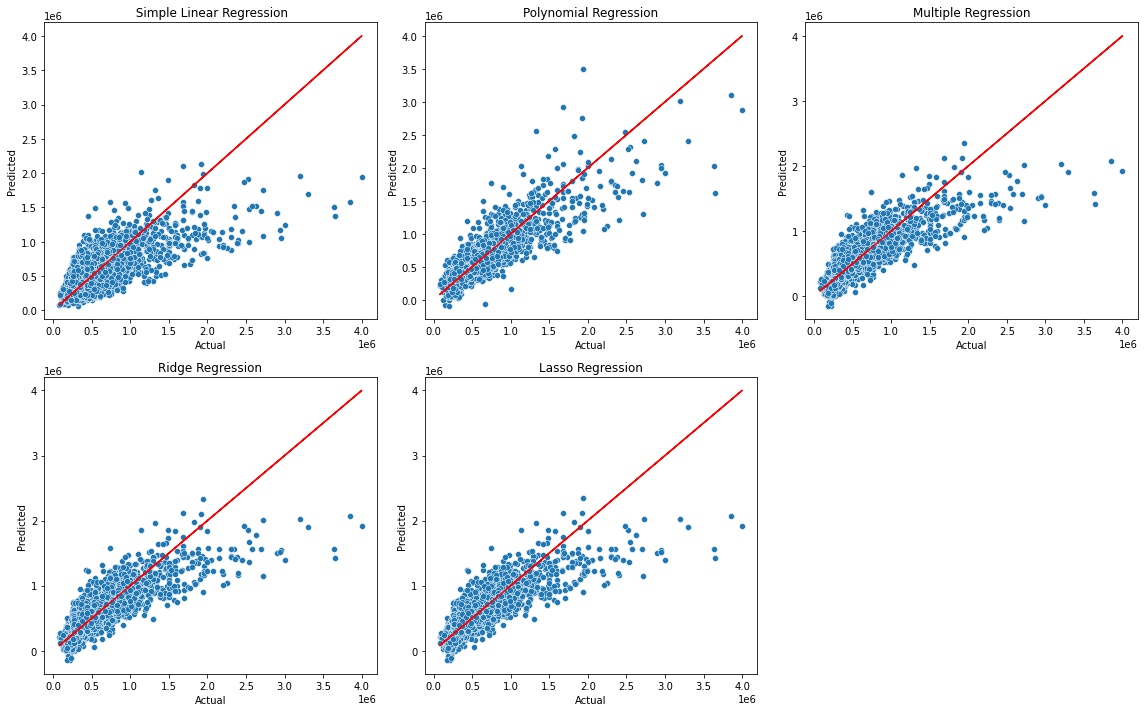

In [52]:
#visualize the actual and predicted values for all five model

plt.figure(figsize=(16, 10)) 
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=y_predictions_simple_linear)
plt.plot(y_test, y_test, color="red")  
plt.title(" Simple Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_test, y=y_predictions_polynomial)
plt.plot(y_test, y_test, color="red")  
plt.title("Polynomial Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(2, 3, 3)
sns.scatterplot(x=y_test, y=y_predictions_multi)
plt.plot(y_test, y_test, color="red") 
plt.title("Multiple Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(2, 3, 4)
sns.scatterplot(x=y_test, y=y_predictions_ridge)
plt.plot(y_test, y_test, color="red") 
plt.title("Ridge Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.subplot(2, 3, 5)  
sns.scatterplot(x=y_test, y=y_predictions_lasso)
plt.plot(y_test, y_test, color="red")  
plt.title("Lasso Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


by observing graphs, we can conclude that polynomial regression model performs very well with this training data. and other 4 models have high bias and then those 4 models are underfitting because thre is much of deviation between actualand predicted values. Polynomial regression model has balanced bias and variance because less deviation between actual and predicted values and spreading pf the output is not large.  

In the following cell, We calculates and displays the Mean Squared Error (MSE) for each of the five regression models (Simple Linear, Polynomial, Multiple, Ridge, and Lasso). The MSE is a measure of the average squared difference between the actual and predicted values, providing a quantitative assessment of model accuracy. Lower MSE values indicate better model performance.

In [53]:
#Mean Squared Error
mse_simple_linear = mean_squared_error(y_test, y_predictions_simple_linear)
print("Mean Squared Error - Simple Linear:", mse_simple_linear)

mse_polynomial = mean_squared_error(y_test, y_predictions_polynomial)
print("Mean Squared Error - Polynomial:", mse_polynomial)

mse_multi_linear = mean_squared_error(y_test, y_predictions_multi)
print("Mean Squared Error - Multi:", mse_multi_linear)

mse_ridge = mean_squared_error(y_test, y_predictions_ridge)
print("Mean Squared Error - Ridge:", mse_ridge)

mse_lasso=mean_squared_error(y_test,y_predictions_lasso)
print("Mean Squared Error - Lasso:", mse_lasso)

Mean Squared Error - Simple Linear: 62809944078.602486
Mean Squared Error - Polynomial: 31620675604.496067
Mean Squared Error - Multi: 41538125135.552986
Mean Squared Error - Ridge: 41494474793.08734
Mean Squared Error - Lasso: 41497740335.47875


Polynomial Regression model has lowest MSE compared to other models and performs well with the training data according to the observation above graphs. So, I chose polynomial regression as the model to make predictions for unlabelled dataset.

#### F. Model Suggestions and Prediction for unlabelled data


This following cell loads unlabelled data from 'test_data.csv', removes date and categorical features, drops the 'id' column, and selects and scales numeric features using a standard scaler. The output scaled features are stored in the 'test_scaled' variable.

In [54]:
#making predictions for unlabelled data
#load the unlabelled data
test_data = pd.read_csv('test_data.csv')
output_df=test_data.copy()
print("Size of unlabelled dataset: ", test_data.shape)
test_data.head(10)
#remove date feature 
test_data.drop('date',axis=1,inplace=True)
#remove categorical features
test_data = test_data.drop(categorical_cols, axis=1, inplace=False)
#drop id feature 
test_data.drop('id',axis=1,inplace=True)
#numeric features of train and test dataframe
test_num_df = test_data.select_dtypes(include=[np.number])
test_scaled = scaler.transform(test_num_df)

Size of unlabelled dataset:  (511, 20)


Polynomial regresssion model is used to predict prices based on this transformed data, adds the predictions to the 'output_df', and saves the results to a CSV file .

In [55]:
#polynomial model is the best performing model
test_polynomial = poly.transform(test_num_df)
predictions = polynomial_reg_model.predict(test_polynomial)

In [56]:
#predictions and output dataframe
output_df['predicted_price'] = predictions
output_df.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted_price
0,1,20141224T000000,3,1.00,1775,5070,1,0,0,4,...,1561,107,1979,0,98137,47.4915,-122.200,1099,5255,-1.002873e+09
1,2,20141020T000000,4,2.50,1836,18994,2,0,0,3,...,891,47,1981,0,98107,47.6464,-122.328,1140,6726,-2.499580e+10
2,3,20140904T000000,4,1.50,1964,5308,2,0,0,3,...,1785,755,1984,0,98034,47.3048,-122.237,2102,5078,5.548876e+09
3,4,20140625T000000,4,2.75,1294,4304,0,0,0,3,...,1263,34,2009,0,98077,47.5398,-122.388,2295,26363,6.034417e+07
4,5,20140502T000000,4,2.75,1736,13308,1,0,0,4,...,1416,6,1969,0,98071,47.6888,-122.318,2095,13990,-7.740119e+09
5,6,20141020T000000,3,1.50,1750,4465,2,0,0,5,...,1689,383,1988,0,98119,47.6720,-122.231,1726,5063,2.755264e+09
6,7,20141030T000000,2,1.50,1478,884,1,0,0,3,...,1470,8,1972,0,98047,47.4569,-122.267,1645,12689,3.793337e+05
7,8,20150219T000000,3,2.25,1232,1608,2,0,0,3,...,2368,153,1921,0,98155,47.7126,-121.947,1513,7596,8.188747e+09
8,9,20140723T000000,2,1.00,1958,21796,1,0,0,3,...,1006,150,1990,1989,98088,47.6457,-122.280,1280,17789,-2.998532e+10
9,10,20140819T000000,3,0.75,1540,19143,1,0,0,3,...,1018,158,1964,0,98016,47.5581,-122.277,1562,1473,-9.190806e+09


In [57]:
#save results to a csv file
output_df.to_csv('500712682.csv', index=False)